In [1]:
from scipy import stats

In [2]:
fonte = 15
params = {
        'font.size': 15,
        'legend.fontsize': fonte,
        'axes.labelsize': fonte,
        'axes.titlesize': fonte,
        'xtick.labelsize': fonte,
        'ytick.labelsize': fonte
}
plt.rcParams.update(params)

os.chdir(os.getcwd() + '\\data\\results')

data = str(datetime.now().year)+'-'+str(datetime.now().month)+'-'+str(datetime.now().day)
data

'2020-6-26'

In [3]:
print_campo = 'n'

if print_campo == 's':
    g = 1
    dpi=300
    lista_pastas = 'Age City Sex Area Renda Corre'.split(' ')
    for c in lista_pastas:
        try:
            os.mkdir(c)
            print('Directory '+c+' created')
        except FileExistsError:
            print('Directory '+c+' already exists')

Directory Age already exists
Directory City already exists
Directory Sex already exists
Directory Area already exists
Directory Renda already exists
Directory Corre already exists


In [4]:
directory = os.listdir('..')
printLis(directory)

-------------
-=< Lista >=-
-------------
0 -> .ipynb_checkpoints
1 -> 01-caso_full_2020-04-22.csv
2 -> 02-caso_full_2020-04-30.csv
3 -> 03-caso_full_2020-05-13.csv
4 -> 04-caso_full_2020-05-23.csv
5 -> 05-caso_full_2020-06-05.csv
6 -> 06-caso_full_2020-06-26.csv
7 -> artigo
8 -> cities.csv
9 -> covid19_municipios.csv
10 -> COVID19_REGIOES BR.csv
11 -> Dados_demográficos_municípios.xlsx
12 -> Dados_demográficos_municípios_new.xlsx
13 -> Datalab_COVID.pptx
14 -> Data_set_socioeconomic_characteristics.csv
15 -> figures
16 -> health_charateristics (2).csv
17 -> idade.xlsx
18 -> obito_cartorio.csv
19 -> População residente municipal x população faixa etária.csv
20 -> População residente por estado - 2015.csv
21 -> População residente x sexo.csv
22 -> results


In [5]:
# 06-caso_full_2020-06-26.csv
date = 6
df_cov =  pd.read_csv('..\\'+directory[date])
df_cov.tail()

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
263563,NaN,43.0,2020-06-25,26,11377239.0,True,False,23060,202.68538,2020-06-25,0.0217,500,108,state,RS,1051,0
263564,NaN,42.0,2020-06-25,26,7164788.0,True,False,21951,306.37334,2020-06-25,0.0132,289,106,state,SC,1030,10
263565,NaN,28.0,2020-06-25,26,2298696.0,True,False,21081,917.08516,2020-06-25,0.0263,554,104,state,SE,728,30
263566,NaN,35.0,2020-06-25,26,45919049.0,True,False,248587,541.35921,2020-06-25,0.0553,13759,122,state,SP,9765,407
263567,NaN,17.0,2020-06-25,26,1572866.0,False,True,9425,599.22460,2020-06-24,0.0194,183,100,state,TO,0,0


In [6]:
df_cov = df_cov[
        (df_cov['date'] == df_cov['date'].tail(1).values[0]) & 
        (df_cov['place_type'] == 'city') & 
        (df_cov['last_available_confirmed'] > 1)
][[
    "city",
    "state",
    "estimated_population_2019",
    "last_available_confirmed",
    "last_available_deaths",
    "last_available_confirmed_per_100k_inhabitants",
    "last_available_death_rate",
]]
df_cov = df_cov.rename(columns={
    "city": "City",
    "state": "State",
    "estimated_population_2019": "Population",
    "last_available_confirmed": "Confirmed",
    "last_available_deaths": "Deaths",
    "last_available_confirmed_per_100k_inhabitants": "Confirmed/100k",
    "last_available_death_rate": "Death Rate",
})
df_cov.head()

,City,State,Population,Confirmed,Deaths,Confirmed/100k,Death Rate
258512,Acrelândia,AC,15256.0,185,3,1212.63765,0.0162
258513,Assis Brasil,AC,7417.0,147,5,1981.93340,0.0340
258514,Brasiléia,AC,26278.0,287,6,1092.16835,0.0209
258515,Bujari,AC,10266.0,151,3,1470.87473,0.0199
258516,Capixaba,AC,11733.0,128,5,1090.94008,0.0391


In [7]:
df_cov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4603 entries, 258512 to 263540
Data columns (total 7 columns):
City              4603 non-null object
State             4603 non-null object
Population        4590 non-null float64
Confirmed         4603 non-null int64
Deaths            4603 non-null int64
Confirmed/100k    4590 non-null float64
Death Rate        4603 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 287.7+ KB


In [8]:
print_virgula(df_cov['Confirmed'].sum())

1,217,721


In [9]:
print_virgula(df_cov['Deaths'].sum())

54,720


In [10]:
# idade.xlsx
date = 17
df_age =  pd.read_excel('..\\'+directory[date])
df_age.head()

,City,0 to 4,5 to 9,10 to 14,15 to 19,20 to 24,25 to 29,30 to 34,35 to 39,40 to 44,45 to 49,50 to 54,55 to 59,60 to 64,65 to 69,70 to 74,75 to 79,80+,Male,Female
0,Abadia de Goiás,542,592,654,738,712,676,661,628,583,486,493,401,269,190,130,76,68,3851,4048
1,Abadia dos Dourados,488,373,488,586,459,513,540,489,588,588,409,425,338,298,175,120,138,3562,3453
2,Abadiânia,1056,1220,1517,1773,1749,1454,1416,1481,1407,1292,1014,804,615,488,350,255,179,9311,8759
3,Abaeté,1337,1445,1800,1737,1723,1866,1700,1572,1601,1788,1668,1491,1159,906,680,470,594,11764,11773
4,Abaetetuba,13306,13949,14402,16028,15908,14122,13018,10887,9103,7195,5684,4861,3886,2793,2052,1258,1402,76696,73158


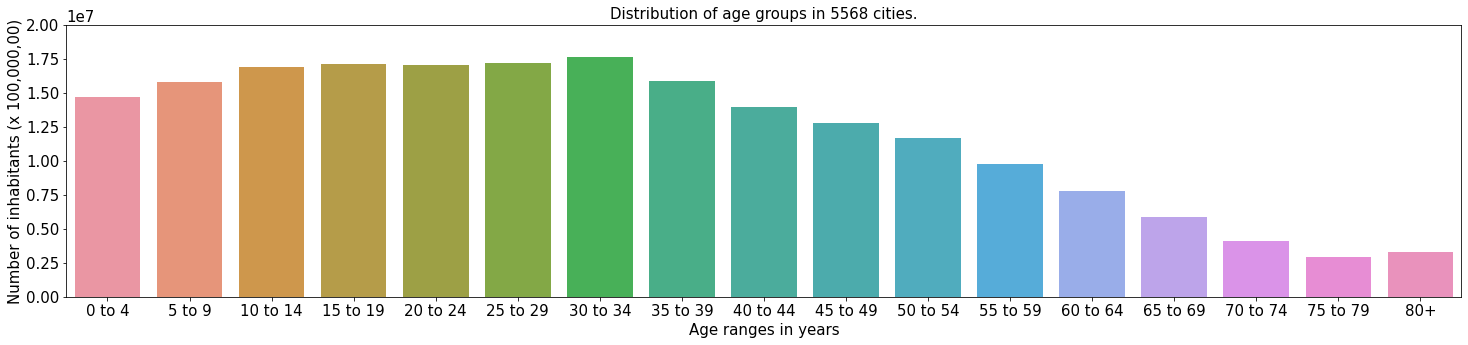

In [11]:
plt.figure(figsize=(25,5))
sns.barplot(
    x=df_age[df_age.columns[1:-2]].sum().index,
    y=df_age[df_age.columns[1:-2]].sum().values
)
plt.title('Distribution of age groups in ' + str(len(df_age)) + ' cities.')
plt.xlabel('Age ranges in years')
plt.ylabel('Number of inhabitants (x 100,000,00)')
plt.ylim(0, 20000000)
if print_campo == 's':
    col2 = lista_pastas[0]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

In [12]:
df_merge_city = pd.merge(df_age, df_cov, on='City')
df_merge_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5146 entries, 0 to 5145
Data columns (total 26 columns):
City              5146 non-null object
0 to 4            5146 non-null int64
5 to 9            5146 non-null int64
10 to 14          5146 non-null int64
15 to 19          5146 non-null int64
20 to 24          5146 non-null int64
25 to 29          5146 non-null int64
30 to 34          5146 non-null int64
35 to 39          5146 non-null int64
40 to 44          5146 non-null int64
45 to 49          5146 non-null int64
50 to 54          5146 non-null int64
55 to 59          5146 non-null int64
60 to 64          5146 non-null int64
65 to 69          5146 non-null int64
70 to 74          5146 non-null int64
75 to 79          5146 non-null int64
80+               5146 non-null int64
Male              5146 non-null int64
Female            5146 non-null int64
State             5146 non-null object
Population        5146 non-null float64
Confirmed         5146 non-null int64
Deaths         

In [13]:
df_age_ed = pd.DataFrame();
df_age_ed['City'] = df_age['City']
df_age_ed['Young'] = df_age['0 to 4'] + df_age['5 to 9'] + df_age['10 to 14'] + df_age['15 to 19'] + df_age['20 to 24'] + df_age['25 to 29']
df_age_ed['Adults'] = df_age['30 to 34'] + df_age['35 to 39'] + df_age['40 to 44'] + df_age['45 to 49'] + df_age['50 to 54'] + df_age['55 to 59'] + df_age['60 to 64']
df_age_ed['Seniors'] = df_age['65 to 69'] + df_age['70 to 74'] + df_age['75 to 79'] + df_age['80+']
df_age_ed['Population_Age'] = df_age_ed['Young'] + df_age_ed['Adults'] + df_age_ed['Seniors']
df_age_ed['Young (%)'] = round(df_age_ed['Young']/df_age_ed['Population_Age'], 2)
df_age_ed['Adults (%)'] = round(df_age_ed['Adults']/df_age_ed['Population_Age'], 2)
df_age_ed['Seniors (%)'] = round(df_age_ed['Seniors']/df_age_ed['Population_Age'], 2)
df_age_ed['Male'] = df_age['Male']
df_age_ed['Female'] = df_age['Female']
df_age_ed['Male (%)'] = round(df_age['Male']/(df_age['Male']+df_age['Female']), 2)
df_age_ed['Female (%)'] = round(df_age['Female']/(df_age['Male']+df_age['Female']), 2)
df_age_ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5568 entries, 0 to 5567
Data columns (total 12 columns):
City              5568 non-null object
Young             5568 non-null int64
Adults            5568 non-null int64
Seniors           5568 non-null int64
Population_Age    5568 non-null int64
Young (%)         5568 non-null float64
Adults (%)        5568 non-null float64
Seniors (%)       5568 non-null float64
Male              5568 non-null int64
Female            5568 non-null int64
Male (%)          5568 non-null float64
Female (%)        5568 non-null float64
dtypes: float64(5), int64(6), object(1)
memory usage: 522.1+ KB


In [14]:
df_age_ed = df_age_ed[[
    "City",
    "Young",
    "Adults",
    "Seniors",
    "Young (%)",
    "Adults (%)",
    "Seniors (%)",
    "Male",
    "Female",
    "Male (%)",
    "Female (%)",
]]
df_age_ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5568 entries, 0 to 5567
Data columns (total 11 columns):
City           5568 non-null object
Young          5568 non-null int64
Adults         5568 non-null int64
Seniors        5568 non-null int64
Young (%)      5568 non-null float64
Adults (%)     5568 non-null float64
Seniors (%)    5568 non-null float64
Male           5568 non-null int64
Female         5568 non-null int64
Male (%)       5568 non-null float64
Female (%)     5568 non-null float64
dtypes: float64(5), int64(5), object(1)
memory usage: 478.6+ KB


In [15]:
printLis(directory)

-------------
-=< Lista >=-
-------------
0 -> .ipynb_checkpoints
1 -> 01-caso_full_2020-04-22.csv
2 -> 02-caso_full_2020-04-30.csv
3 -> 03-caso_full_2020-05-13.csv
4 -> 04-caso_full_2020-05-23.csv
5 -> 05-caso_full_2020-06-05.csv
6 -> 06-caso_full_2020-06-26.csv
7 -> artigo
8 -> cities.csv
9 -> covid19_municipios.csv
10 -> COVID19_REGIOES BR.csv
11 -> Dados_demográficos_municípios.xlsx
12 -> Dados_demográficos_municípios_new.xlsx
13 -> Datalab_COVID.pptx
14 -> Data_set_socioeconomic_characteristics.csv
15 -> figures
16 -> health_charateristics (2).csv
17 -> idade.xlsx
18 -> obito_cartorio.csv
19 -> População residente municipal x população faixa etária.csv
20 -> População residente por estado - 2015.csv
21 -> População residente x sexo.csv
22 -> results


In [16]:
# Dados_demográficos_municípios_new.xlsx
date = 12
df_mun =  pd.read_excel('..\\'+directory[date], skiprows=1)
df_mun.head()

,Municípios,UF,Área Territorial - km² [2018],População estimada - pessoas [2019],Densidade demográfica - hab/km² [2010],IDHM - Índice de desenvolvimento humano municipal [2010],Renda per capita (Salário médio mensal dos trabalhadores formais [2017])
0,Poá,SP,17.264,117452,6141.05,0.771,3.3
1,Santos,SP,281.033,433311,1494.26,0.84,1.5
2,São Domingos do Sul,RS,78.67,3074,37.06,0.763,3.6
3,São Francisco do Sul,SC,493.418,52721,85.27,0.762,1.7
4,São Gabriel,RS,5051.85,62105,12.03,0.699,2.0


In [17]:
df_mun = df_mun[[
    "Municípios",
    "Área Territorial - km² [2018]",
    "Densidade demográfica - hab/km² [2010]",
    "IDHM - Índice de desenvolvimento humano municipal [2010]",
    "Renda per capita (Salário médio mensal dos trabalhadores formais [2017])",
]]
df_mun = df_mun.rename(columns={
    "Municípios": "City",
    "Área Territorial - km² [2018]": "Area (km²)",
    "Densidade demográfica - hab/km² [2010]": "Demographic density (hab/km²)",
    "IDHM - Índice de desenvolvimento humano municipal [2010]": "MHDI",
    "Renda per capita (Salário médio mensal dos trabalhadores formais [2017])": "Income (per capita)",
})
df_mun['Area (km²)'] = df_mun['Area (km²)'].astype('float64')
df_mun['Demographic density (hab/km²)'] = df_mun['Demographic density (hab/km²)'].astype('float64')
df_mun['MHDI'] = df_mun['MHDI'].astype('float64')
df_mun.head()

,City,Area (km²),Demographic density (hab/km²),MHDI,Income (per capita)
0,Poá,17.264,6141.05,0.771,3.3
1,Santos,281.033,1494.26,0.840,1.5
2,São Domingos do Sul,78.670,37.06,0.763,3.6
3,São Francisco do Sul,493.418,85.27,0.762,1.7
4,São Gabriel,5051.850,12.03,0.699,2.0


In [18]:
df_prev = pd.merge(df_cov, df_mun, on="City")
df = pd.merge(df_prev, df_age_ed, on="City")
df.fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672 entries, 0 to 671
Data columns (total 21 columns):
City                             672 non-null object
State                            672 non-null object
Population                       672 non-null float64
Confirmed                        672 non-null int64
Deaths                           672 non-null int64
Confirmed/100k                   672 non-null float64
Death Rate                       672 non-null float64
Area (km²)                       672 non-null float64
Demographic density (hab/km²)    672 non-null float64
MHDI                             672 non-null float64
Income (per capita)              672 non-null float64
Young                            672 non-null int64
Adults                           672 non-null int64
Seniors                          672 non-null int64
Young (%)                        672 non-null float64
Adults (%)                       672 non-null float64
Seniors (%)                      672 non-nu

In [19]:
df_age_cov = pd.merge(df['City'], df_age, on='City')
df_age_cov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 20 columns):
City        1000 non-null object
0 to 4      1000 non-null int64
5 to 9      1000 non-null int64
10 to 14    1000 non-null int64
15 to 19    1000 non-null int64
20 to 24    1000 non-null int64
25 to 29    1000 non-null int64
30 to 34    1000 non-null int64
35 to 39    1000 non-null int64
40 to 44    1000 non-null int64
45 to 49    1000 non-null int64
50 to 54    1000 non-null int64
55 to 59    1000 non-null int64
60 to 64    1000 non-null int64
65 to 69    1000 non-null int64
70 to 74    1000 non-null int64
75 to 79    1000 non-null int64
80+         1000 non-null int64
Male        1000 non-null int64
Female      1000 non-null int64
dtypes: int64(19), object(1)
memory usage: 164.1+ KB


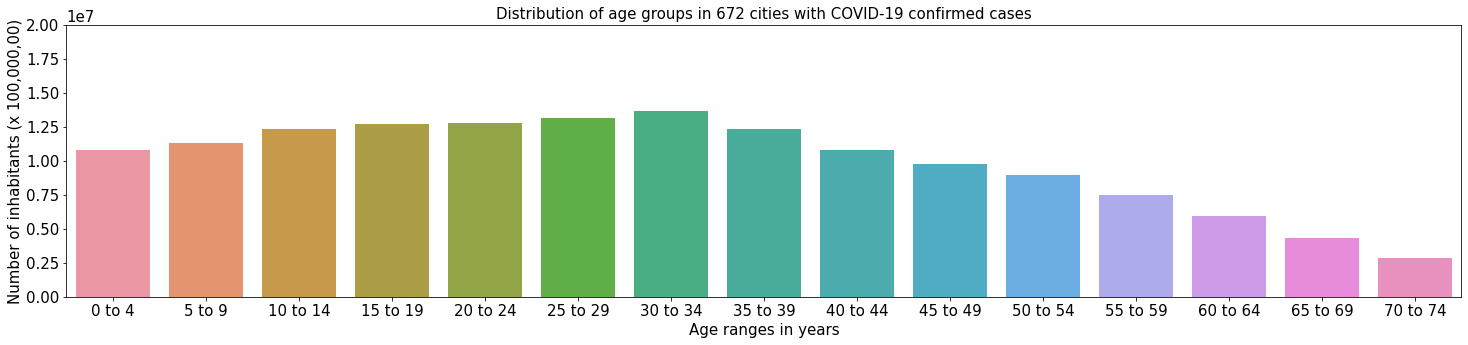

In [20]:
plt.figure(figsize=(25,5))
sns.barplot(
    x=df_age_cov[df_age_cov.columns[1:-4]].sum().index,
    y=df_age_cov[df_age_cov.columns[1:-4]].sum().values
)
plt.title('Distribution of age groups in ' + str(len(df)) + ' cities with COVID-19 confirmed cases')
plt.xlabel('Age ranges in years')
plt.ylabel('Number of inhabitants (x 100,000,00)')
plt.ylim(0, 20000000)
if print_campo == 's':
    col2 = lista_pastas[0]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

In [21]:
print_virgula(df_age_cov[df_age_cov.columns[1:-2]].sum().sum())

153,528,953


In [22]:
num_cid_stad = {
    'State': 'AC AL AP AM BA CE ES GO MA MT MS MG PA PB PR PE PI RJ RN RS RO RR SC SP SE TO'.split(' '),
    '#_cities': [22, 102, 16, 62, 417, 184, 78, 246, 217, 141, 79, 853, 144, 223, 399, 185, 224, 92, 167, 497, 52, 15, 295, 645, 75, 139]
}
num_cid_stad = pd.DataFrame(num_cid_stad)
num_cid_stad

,State,#_cities
0,AC,22
1,AL,102
2,AP,16
3,AM,62
4,BA,417
5,CE,184
6,ES,78
7,GO,246
8,MA,217
9,MT,141


In [23]:
df_state = pd.DataFrame(df['State'].value_counts()).reset_index()
df_state = df_state.rename(columns={
    "index": "State",
    "State": "count_cities",
})
df_states_conut = pd.merge(num_cid_stad, df_state, on=['State'])
df_states_conut['Cities (%)'] = round(df_states_conut['count_cities']/df_states_conut['#_cities'], 2)
df_states_conut

,State,#_cities,count_cities,Cities (%)
0,AC,22,7,0.32
1,AL,102,12,0.12
2,AP,16,1,0.06
3,AM,62,10,0.16
4,BA,417,46,0.11
5,CE,184,24,0.13
6,ES,78,20,0.26
7,GO,246,24,0.10
8,MA,217,10,0.05
9,MT,141,12,0.09


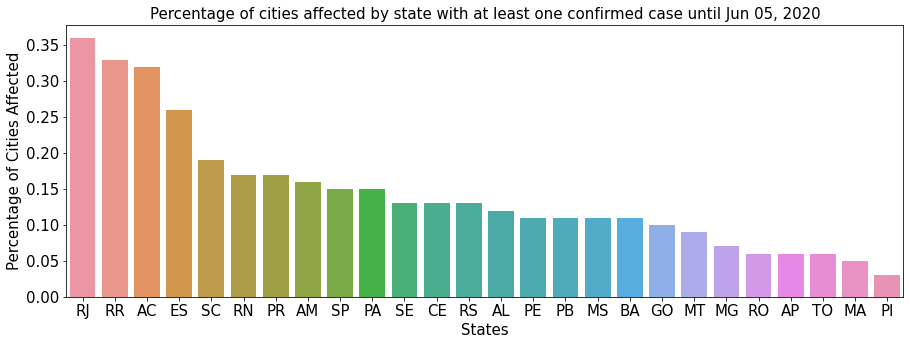

In [24]:
plt.figure(figsize=(15,5))
sns.barplot(
    x='State',
    y='Cities (%)',
    data=df_states_conut.sort_values(by='Cities (%)', ascending=False)
)
plt.ylabel('Percentage of Cities Affected')
plt.xlabel('States')
plt.title('Percentage of cities affected by state with at least one confirmed case until Jun 05, 2020')
if print_campo == 's':
    col2 = lista_pastas[1]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672 entries, 0 to 671
Data columns (total 21 columns):
City                             672 non-null object
State                            672 non-null object
Population                       672 non-null float64
Confirmed                        672 non-null int64
Deaths                           672 non-null int64
Confirmed/100k                   672 non-null float64
Death Rate                       672 non-null float64
Area (km²)                       672 non-null float64
Demographic density (hab/km²)    672 non-null float64
MHDI                             672 non-null float64
Income (per capita)              672 non-null float64
Young                            672 non-null int64
Adults                           672 non-null int64
Seniors                          672 non-null int64
Young (%)                        672 non-null float64
Adults (%)                       672 non-null float64
Seniors (%)                      672 non-nu

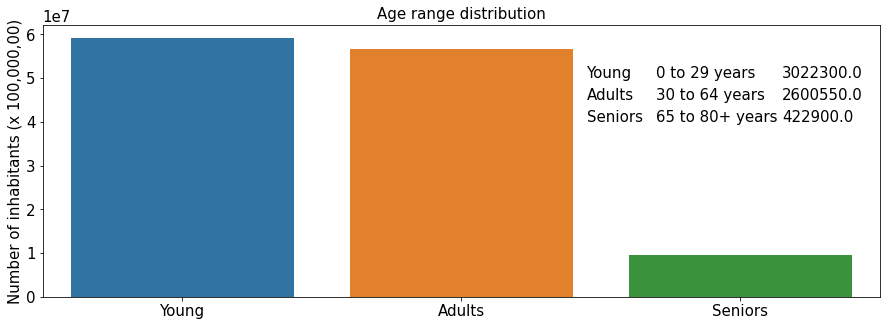

In [26]:
legend_range = [
    '0 to 29 years',
    '30 to 64 years',
    '65 to 80+ years',
]
legend_name = list()
legend_perc = list()
for c in range(11, 14):
    legend_name.append(df.columns[c])
    legend_perc.append(round(df.iloc[:, c].median()*100, 0))
 
plt.figure(figsize=(15,5))
sns.barplot(
    x=df[df.columns[11:-7]].sum().index,
    y=df[df.columns[11:-7]].sum().values
)
plt.title('Age range distribution')
a = 50000000
b = a/10
x = 1.45
y = a
for c in range(3):
    plt.text(x, y, legend_name[c])
    y -= b
x = 1.7
y = a
for c in range(3):
    plt.text(x, y, legend_range[c])
    y -= b
x = 2.15
y = a
for c in range(3):
    plt.text(x, y, legend_perc[c])
    y -= b
plt.ylabel("Number of inhabitants (x 100,000,00)")
if print_campo == 's':
    col2 = lista_pastas[0]
    g += 1
#     plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

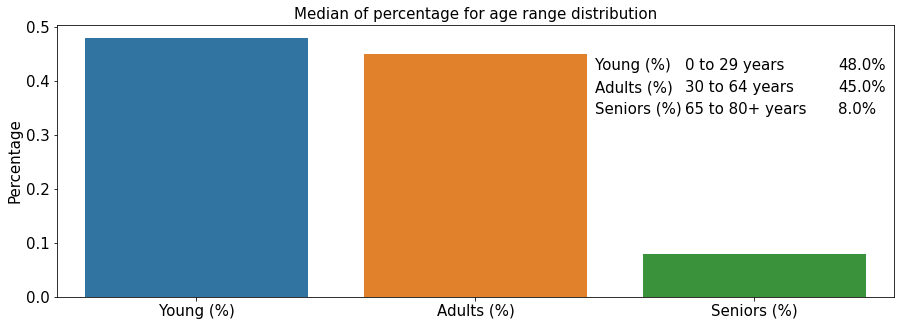

In [27]:
legend_name = list()
legend_perc = list()
for c in range(14, 17):
    legend_name.append(df.columns[c])
    legend_perc.append(str(round(df.iloc[:, c].median()*100, 0))+'%')
    
plt.figure(figsize=(15,5))
sns.barplot(
    x=df.iloc[:, 14:-4].median().index,
    y=df.iloc[:, 14:-4].median().values
)
plt.title('Median of percentage for age range distribution')
x = 1.43
y = 0.46
for c in range(3):
    y -= 0.04
    plt.text(x, y, legend_name[c])
x = 1.75
y = 0.46
for c in range(3):
    y -= 0.04
    plt.text(x, y, legend_range[c])
x = 2.3
y = 0.46
for c in range(3):
    y -= 0.04
    plt.text(x, y, legend_perc[c])
plt.ylabel("Percentage")
if print_campo == 's':
    col2 = lista_pastas[0]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

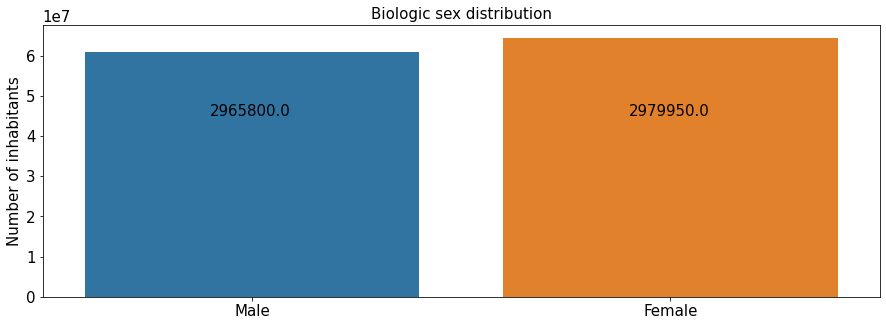

In [28]:
legend_name = list()
legend_perc = list()
for c in range(17, 19):
    legend_name.append(df.columns[c])
    legend_perc.append(round(df.iloc[:, c].median()*100, 0))
 
plt.figure(figsize=(15,5))
sns.barplot(
    x=df[df.columns[17:19]].sum().index,
    y=df[df.columns[17:19]].sum().values
)
plt.title('Biologic sex distribution')
x = -0.1
y = 45000000
plt.text(x, y, legend_perc[0])
x = 0.9
plt.text(x, y, legend_perc[1])
plt.ylabel("Number of inhabitants")
if print_campo == 's':
    col2 = lista_pastas[2]
    g += 1
#     plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

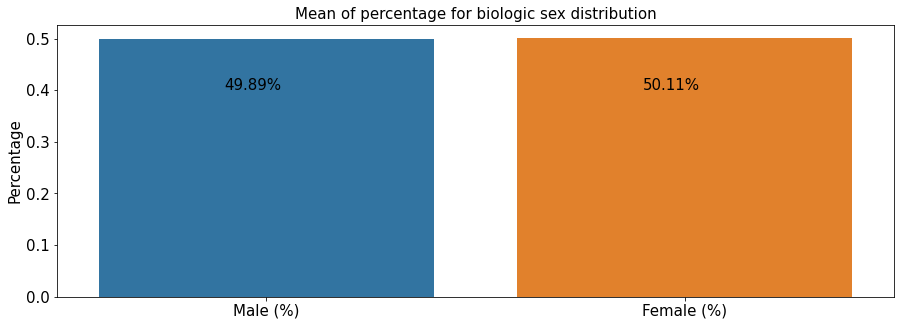

In [29]:
legend_name = list()
legend_perc = list()
for c in range(19, 21):
    legend_name.append(df.columns[c])
    legend_perc.append(str(round(df.iloc[:, c].mean()*100, 2))+'%')
    
plt.figure(figsize=(15,5))
sns.barplot(
    x=df.iloc[:, 19:].mean().index,
    y=df.iloc[:, 19:].mean().values
)
plt.title('Mean of percentage for biologic sex distribution')
x = -0.1
y = 0.4
plt.text(x, y, legend_perc[0])
x = 0.9
plt.text(x, y, legend_perc[1])
plt.ylabel("Percentage")
if print_campo == 's':
    col2 = lista_pastas[2]
    g += 1
#     plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672 entries, 0 to 671
Data columns (total 21 columns):
City                             672 non-null object
State                            672 non-null object
Population                       672 non-null float64
Confirmed                        672 non-null int64
Deaths                           672 non-null int64
Confirmed/100k                   672 non-null float64
Death Rate                       672 non-null float64
Area (km²)                       672 non-null float64
Demographic density (hab/km²)    672 non-null float64
MHDI                             672 non-null float64
Income (per capita)              672 non-null float64
Young                            672 non-null int64
Adults                           672 non-null int64
Seniors                          672 non-null int64
Young (%)                        672 non-null float64
Adults (%)                       672 non-null float64
Seniors (%)                      672 non-nu

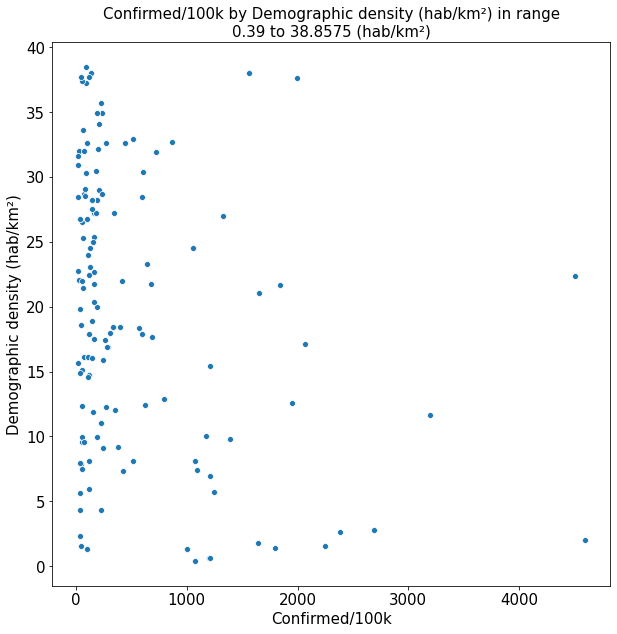

In [31]:
q1 = 3
q2 = q1 + 1
col1 = "Confirmed/100k"
col2 = "Demographic density (hab/km²)"
col3 = "Demographic density (hab/km²)"
plt.figure(figsize=(10,10))
sns.scatterplot(
    x=col1,
    y=col2,
    data=df[(df[col3] >= df[col3].describe()[q1]) & (df[col3] < df[col3].describe()[q2])]
)
plt.title(col1+' by '+col2+' in range\n'+str(df[col3].describe()[q1])+' to '+str(df[col3].describe()[q2])+' (hab/km²)')
if print_campo == 's':
    col2 = lista_pastas[3]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

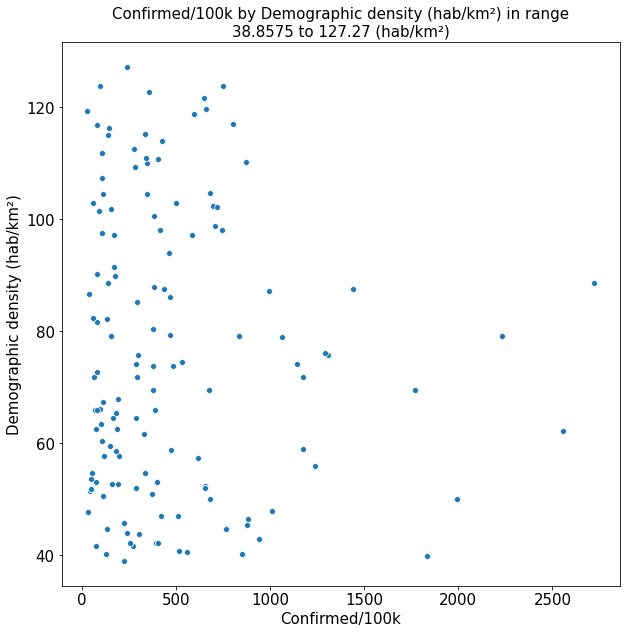

In [32]:
q1 += 1
q2 = q1 + 1
col1 = "Confirmed/100k"
col2 = "Demographic density (hab/km²)"
col3 = "Demographic density (hab/km²)"
plt.figure(figsize=(10,10))
sns.scatterplot(
    x=col1,
    y=col2,
    data=df[(df[col3] >= df[col3].describe()[q1]) & (df[col3] < df[col3].describe()[q2])]
)
plt.title(col1+' by '+col2+' in range\n'+str(df[col3].describe()[q1])+' to '+str(df[col3].describe()[q2])+' (hab/km²)')
if print_campo == 's':
    col2 = lista_pastas[3]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

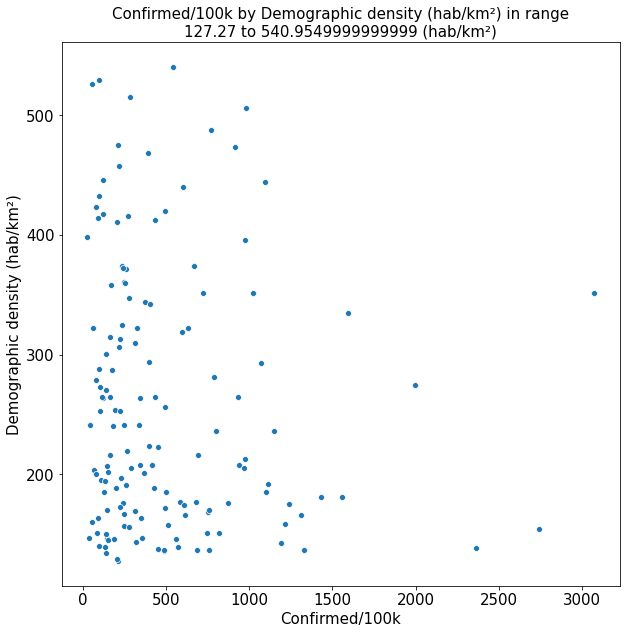

In [33]:
q1 += 1
q2 = q1 + 1
col1 = "Confirmed/100k"
col2 = "Demographic density (hab/km²)"
col3 = "Demographic density (hab/km²)"
plt.figure(figsize=(10,10))
sns.scatterplot(
    x=col1,
    y=col2,
    data=df[(df[col3] >= df[col3].describe()[q1]) & (df[col3] < df[col3].describe()[q2])]
)
plt.title(col1+' by '+col2+' in range\n'+str(df[col3].describe()[q1])+' to '+str(df[col3].describe()[q2])+' (hab/km²)')
if print_campo == 's':
    col2 = lista_pastas[3]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

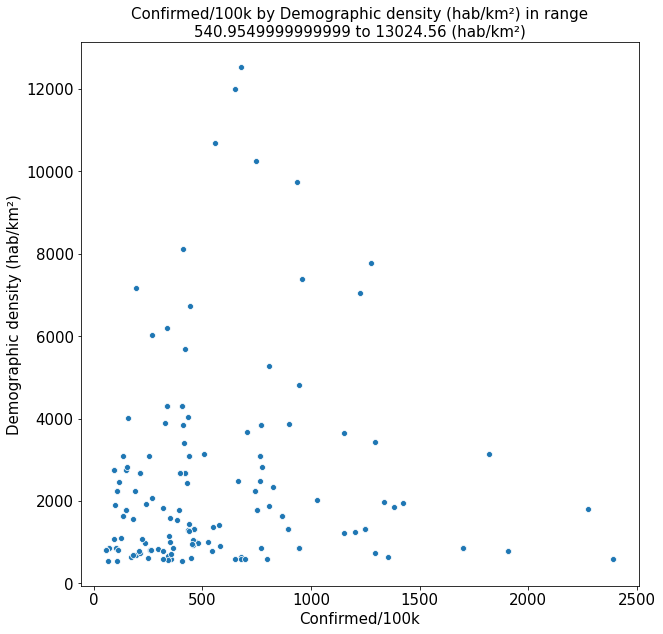

In [34]:
q1 += 1
q2 = q1 + 1
col1 = "Confirmed/100k"
col2 = "Demographic density (hab/km²)"
col3 = "Demographic density (hab/km²)"
plt.figure(figsize=(10,10))
sns.scatterplot(
    x=col1,
    y=col2,
    data=df[(df[col3] >= df[col3].describe()[q1]) & (df[col3] < df[col3].describe()[q2])]
)
plt.title(col1+' by '+col2+' in range\n'+str(df[col3].describe()[q1])+' to '+str(df[col3].describe()[q2])+' (hab/km²)')
if print_campo == 's':
    col2 = lista_pastas[3]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

In [35]:
df['Demographic density (hab/km²)'].describe()

count      672.000000
mean       683.762113
std       1538.063526
min          0.390000
25%         38.857500
50%        127.270000
75%        540.955000
max      13024.560000
Name: Demographic density (hab/km²), dtype: float64

In [36]:
print_virgula(len(df[df['Demographic density (hab/km²)'] >= 23.8]))

577


In [37]:
df.loc[df['Demographic density (hab/km²)'].idxmin()]

City                             Novo Airão
State                                    AM
Population                            19454
Confirmed                               209
Deaths                                    5
Confirmed/100k                      1074.33
Death Rate                           0.0239
Area (km²)                          37776.8
Demographic density (hab/km²)          0.39
MHDI                                   0.57
Income (per capita)                     1.9
Young                                 11234
Adults                                 5766
Seniors                                 670
Young (%)                              0.64
Adults (%)                             0.33
Seniors (%)                            0.04
Male                                   9241
Female                                 8429
Male (%)                               0.52
Female (%)                             0.48
Name: 45, dtype: object

In [38]:
df.loc[df['Demographic density (hab/km²)'].idxmax()]

City                             São João de Meriti
State                                            RJ
Population                                   472406
Confirmed                                      1582
Deaths                                          186
Confirmed/100k                              334.881
Death Rate                                   0.1176
Area (km²)                                   35.216
Demographic density (hab/km²)               13024.6
MHDI                                          0.719
Income (per capita)                             3.7
Young                                        208241
Adults                                       212591
Seniors                                       39791
Young (%)                                      0.45
Adults (%)                                     0.46
Seniors (%)                                    0.09
Male                                         221562
Female                                       239061
Male (%)    

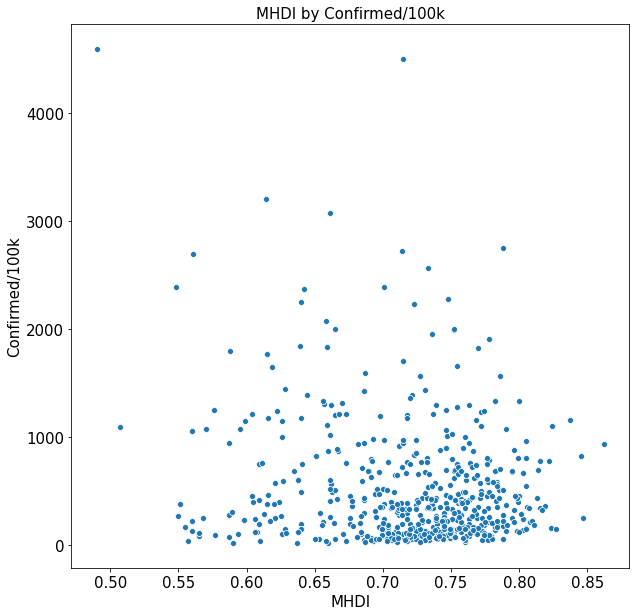

In [39]:
q1 = 1
q2 = q1 + 1
col2 = "Confirmed/100k"
col1 = "MHDI"
plt.figure(figsize=(10,10))
sns.scatterplot(
    x=col1,
    y=col2,
    sizes=(50,500),
    data=df,
)
plt.title(col1+' by '+col2)
if print_campo == 's':
    col2 = lista_pastas[4]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

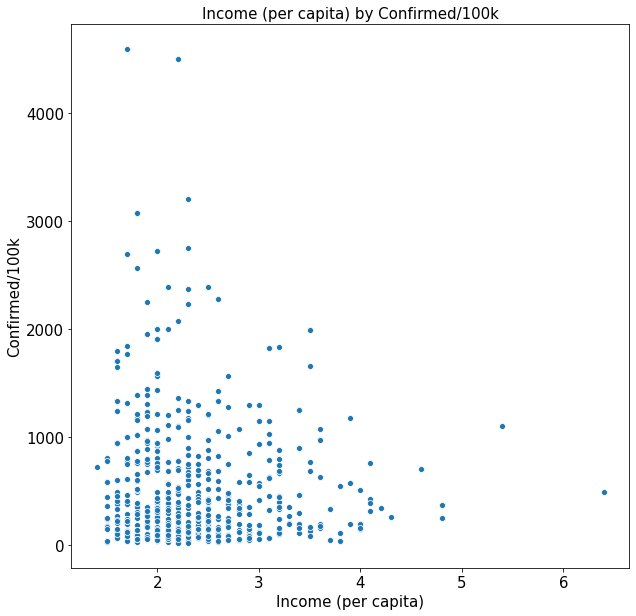

In [40]:
q1 = 1
q2 = q1 + 1
col2 = "Confirmed/100k"
col1 = "Income (per capita)"
plt.figure(figsize=(10,10))
sns.scatterplot(
    x=col1,
    y=col2,
    sizes=(50,500),
    data=df,
)
plt.title(col1+' by '+col2)
if print_campo == 's':
    col2 = lista_pastas[4]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672 entries, 0 to 671
Data columns (total 21 columns):
City                             672 non-null object
State                            672 non-null object
Population                       672 non-null float64
Confirmed                        672 non-null int64
Deaths                           672 non-null int64
Confirmed/100k                   672 non-null float64
Death Rate                       672 non-null float64
Area (km²)                       672 non-null float64
Demographic density (hab/km²)    672 non-null float64
MHDI                             672 non-null float64
Income (per capita)              672 non-null float64
Young                            672 non-null int64
Adults                           672 non-null int64
Seniors                          672 non-null int64
Young (%)                        672 non-null float64
Adults (%)                       672 non-null float64
Seniors (%)                      672 non-nu

In [42]:
df.loc[df['Confirmed/100k'].idxmax()]

City                             Santo Antônio do Içá
State                                              AM
Population                                      21602
Confirmed                                         992
Deaths                                             19
Confirmed/100k                                4592.17
Death Rate                                     0.0192
Area (km²)                                    12366.1
Demographic density (hab/km²)                    1.99
MHDI                                             0.49
Income (per capita)                               1.7
Young                                           16617
Adults                                           6333
Seniors                                           736
Young (%)                                         0.7
Adults (%)                                       0.27
Seniors (%)                                      0.03
Male                                            12106
Female                      

In [43]:
df.loc[df['Confirmed/100k'].idxmin()]

City                              Utinga
State                                 BA
Population                         19178
Confirmed                              3
Deaths                                 1
Confirmed/100k                   15.6429
Death Rate                        0.3333
Area (km²)                        633.76
Demographic density (hab/km²)      28.47
MHDI                                0.59
Income (per capita)                  2.2
Young                              10820
Adults                              7367
Seniors                             1403
Young (%)                           0.55
Adults (%)                          0.38
Seniors (%)                         0.07
Male                                9657
Female                              9933
Male (%)                            0.49
Female (%)                          0.51
Name: 122, dtype: object

In [44]:
df_mod = pd.DataFrame()
for k, v in enumerate(df.columns):
    if k in [5,6,8,9,10,14,15,16,19,20]:
        df_mod[v] = df[v]
#         df_mod[v] = df[df['Confirmed/100k'] < 2000][v]
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672 entries, 0 to 671
Data columns (total 10 columns):
Confirmed/100k                   672 non-null float64
Death Rate                       672 non-null float64
Demographic density (hab/km²)    672 non-null float64
MHDI                             672 non-null float64
Income (per capita)              672 non-null float64
Young (%)                        672 non-null float64
Adults (%)                       672 non-null float64
Seniors (%)                      672 non-null float64
Male (%)                         672 non-null float64
Female (%)                       672 non-null float64
dtypes: float64(10)
memory usage: 57.8 KB


In [45]:
df_mod['Confirmed/100k'].describe()

count     672.000000
mean      517.033277
std       570.762355
min        15.642920
25%       143.665260
50%       336.312540
75%       684.754835
max      4592.167390
Name: Confirmed/100k, dtype: float64

In [46]:
for campo in df_mod.columns:
    qmin = df_mod[campo].describe().values[3]
    qmax = df_mod[campo].describe().values[4]
    q1_list = df_mod[(df_mod[campo] >= qmin) & (df_mod[campo] <= qmax)].index
    qmin = df_mod[campo].describe().values[4]
    qmax = df_mod[campo].describe().values[5]
    q2_list = df_mod[(df_mod[campo] > qmin) & (df_mod[campo] <= qmax)].index
    qmin = df_mod[campo].describe().values[5]
    qmax = df_mod[campo].describe().values[6]
    q3_list = df_mod[(df_mod[campo] > qmin) & (df_mod[campo] <= qmax)].index
    qmin = df_mod[campo].describe().values[6]
    qmax = df_mod[campo].describe().values[7]
    q4_list = df_mod[(df_mod[campo] > qmin) & (df_mod[campo] <= qmax)].index
    df_mod.loc[q1_list, campo+' Quartil'] = 1
    df_mod.loc[q2_list, campo+' Quartil'] = 2
    df_mod.loc[q3_list, campo+' Quartil'] = 3
    df_mod.loc[q4_list, campo+' Quartil'] = 4
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672 entries, 0 to 671
Data columns (total 20 columns):
Confirmed/100k                           672 non-null float64
Death Rate                               672 non-null float64
Demographic density (hab/km²)            672 non-null float64
MHDI                                     672 non-null float64
Income (per capita)                      672 non-null float64
Young (%)                                672 non-null float64
Adults (%)                               672 non-null float64
Seniors (%)                              672 non-null float64
Male (%)                                 672 non-null float64
Female (%)                               672 non-null float64
Confirmed/100k Quartil                   672 non-null float64
Death Rate Quartil                       672 non-null float64
Demographic density (hab/km²) Quartil    672 non-null float64
MHDI Quartil                             672 non-null float64
Income (per capita) Quartil

In [47]:
printLis(df_mod.columns)

-------------
-=< Lista >=-
-------------
0 -> Confirmed/100k
1 -> Death Rate
2 -> Demographic density (hab/km²)
3 -> MHDI
4 -> Income (per capita)
5 -> Young (%)
6 -> Adults (%)
7 -> Seniors (%)
8 -> Male (%)
9 -> Female (%)
10 -> Confirmed/100k Quartil
11 -> Death Rate Quartil
12 -> Demographic density (hab/km²) Quartil
13 -> MHDI Quartil
14 -> Income (per capita) Quartil
15 -> Young (%) Quartil
16 -> Adults (%) Quartil
17 -> Seniors (%) Quartil
18 -> Male (%) Quartil
19 -> Female (%) Quartil


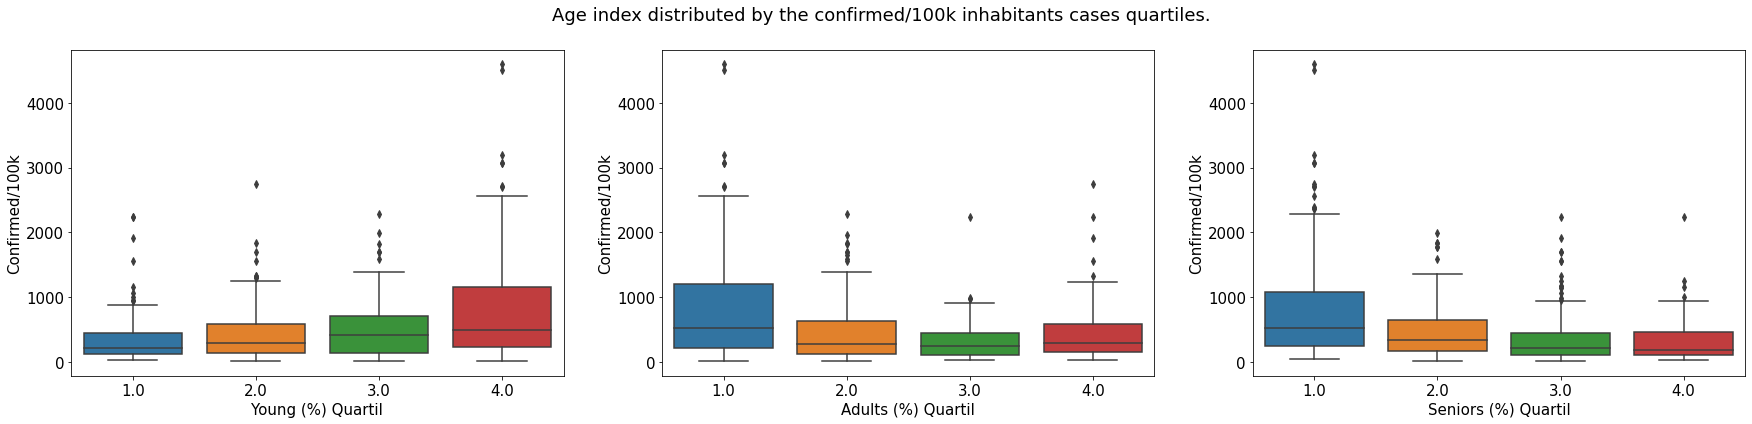

In [48]:
fig, ax = plt.subplots(1, 3, figsize=(30,6))
plt.suptitle('Age index distributed by the confirmed/100k inhabitants cases quartiles.')
a = 0
for c in range(5, 2, -1):
    sns.boxplot(
        x=df_mod.columns[-c],
        y=df_mod.columns[0],
        data=df_mod,
        ax=ax[a]
    )
    a += 1
if print_campo == 's':
    col2 = lista_pastas[5]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

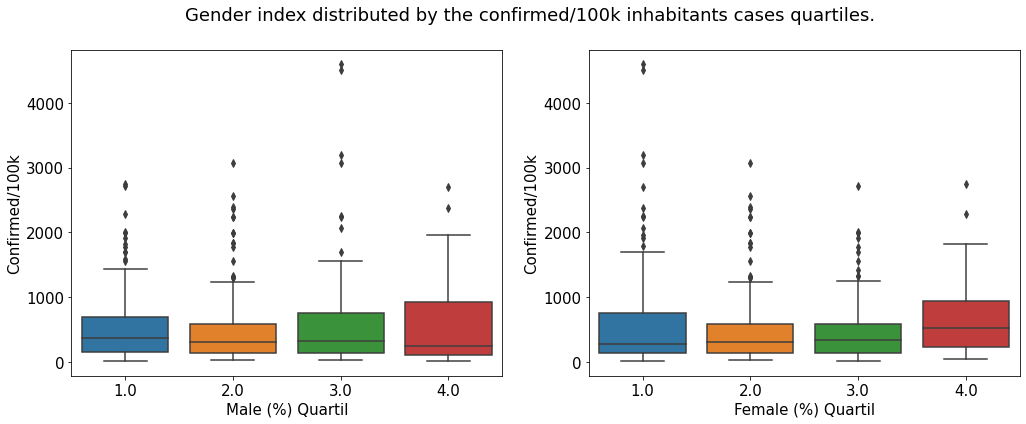

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(17,6))
plt.suptitle('Gender index distributed by the confirmed/100k inhabitants cases quartiles.')
a = 0
for c in range(2, 0, -1):
    sns.boxplot(
        x=df_mod.columns[-c],
        y=df_mod.columns[0],
        data=df_mod,
        ax=ax[a]
    )
    a += 1
a = 0
if print_campo == 's':
    col2 = lista_pastas[5]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

In [50]:
campo_test = 'Young (%)'
for c in range(1, 5):
    print(c)
    print(f"{df_mod[df_mod[campo_test + ' Quartil'] == c][campo_test].min() * 100}%")
    print(f"{df_mod[df_mod[campo_test + ' Quartil'] == c][campo_test].max() * 100}%")

1
34.0%
44.0%
2
45.0%
48.0%
3
49.0%
51.0%
4
52.0%
71.0%


In [51]:
campo_test = 'Adults (%)'
for c in range(1, 5):
    print(c)
    print(f"{df_mod[df_mod[campo_test + ' Quartil'] == c][campo_test].min() * 100}%")
    print(f"{df_mod[df_mod[campo_test + ' Quartil'] == c][campo_test].max() * 100}%")

1
26.0%
41.0%
2
42.0%
45.0%
3
46.0%
46.0%
4
47.0%
52.0%


In [52]:
campo_test = 'Seniors (%)'
for c in range(1, 5):
    print(c)
    print(f"{df_mod[df_mod[campo_test + ' Quartil'] == c][campo_test].min() * 100}%")
    print(f"{df_mod[df_mod[campo_test + ' Quartil'] == c][campo_test].max() * 100}%")

1
2.0%
6.0%
2
7.000000000000001%
8.0%
3
9.0%
10.0%
4
11.0%
16.0%


In [53]:
campo_test = 'Male (%)'
for c in range(1, 5):
    print(c)
    print(f"{df_mod[df_mod[campo_test + ' Quartil'] == c][campo_test].min() * 100}%")
    print(f"{df_mod[df_mod[campo_test + ' Quartil'] == c][campo_test].max() * 100}%")

1
46.0%
49.0%
2
50.0%
50.0%
3
51.0%
51.0%
4
52.0%
69.0%


In [54]:
campo_test = 'Female (%)'
for c in range(1, 5):
    print(c)
    print(f"{df_mod[df_mod[campo_test + ' Quartil'] == c][campo_test].min() * 100}%")
    print(f"{df_mod[df_mod[campo_test + ' Quartil'] == c][campo_test].max() * 100}%")

1
31.0%
49.0%
2
50.0%
50.0%
3
51.0%
51.0%
4
52.0%
54.0%


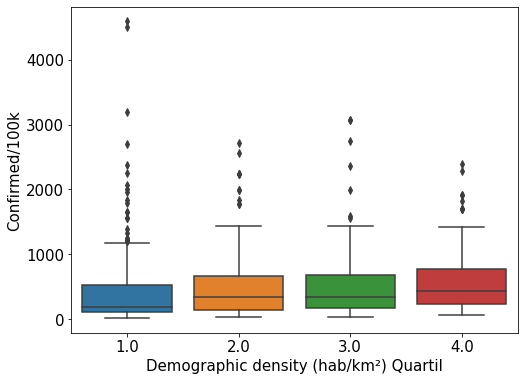

In [55]:
plt.figure(figsize=(8,6))
sns.boxplot(
    x=df_mod.columns[-8],
    y=df_mod.columns[0],
    data=df_mod,
)
if print_campo == 's':
    col2 = lista_pastas[5]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

In [56]:
df_mod = df_mod.drop([df_mod.columns[-7], df_mod.columns[-6]], axis=1)
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672 entries, 0 to 671
Data columns (total 18 columns):
Confirmed/100k                           672 non-null float64
Death Rate                               672 non-null float64
Demographic density (hab/km²)            672 non-null float64
MHDI                                     672 non-null float64
Income (per capita)                      672 non-null float64
Young (%)                                672 non-null float64
Adults (%)                               672 non-null float64
Seniors (%)                              672 non-null float64
Male (%)                                 672 non-null float64
Female (%)                               672 non-null float64
Confirmed/100k Quartil                   672 non-null float64
Death Rate Quartil                       672 non-null float64
Demographic density (hab/km²) Quartil    672 non-null float64
Young (%) Quartil                        672 non-null float64
Adults (%) Quartil         

In [57]:
campo = df_mod.columns[3]
qmin = df_mod[campo].min()
qmax = df_mod[campo].max()
qvalue = (qmax - qmin) / 3
qlow = qmin + qvalue
qmed = qlow + qvalue
qaver = qmed + qvalue
q1_list = df_mod[(df_mod[campo] >= qmin) & (df_mod[campo] <= qlow)].index
df_mod.loc[q1_list, campo+' Quartil'] = 1
q1_list = df_mod[(df_mod[campo] >= qlow) & (df_mod[campo] <= qmed)].index
df_mod.loc[q1_list, campo+' Quartil'] = 2
q1_list = df_mod[(df_mod[campo] >= qmed) & (df_mod[campo] <= qaver)].index
df_mod.loc[q1_list, campo+' Quartil'] = 3
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672 entries, 0 to 671
Data columns (total 19 columns):
Confirmed/100k                           672 non-null float64
Death Rate                               672 non-null float64
Demographic density (hab/km²)            672 non-null float64
MHDI                                     672 non-null float64
Income (per capita)                      672 non-null float64
Young (%)                                672 non-null float64
Adults (%)                               672 non-null float64
Seniors (%)                              672 non-null float64
Male (%)                                 672 non-null float64
Female (%)                               672 non-null float64
Confirmed/100k Quartil                   672 non-null float64
Death Rate Quartil                       672 non-null float64
Demographic density (hab/km²) Quartil    672 non-null float64
Young (%) Quartil                        672 non-null float64
Adults (%) Quartil         

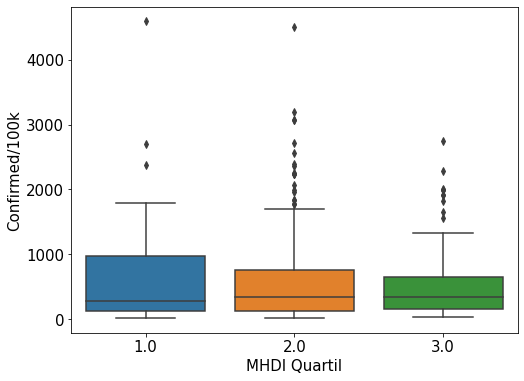

In [58]:
plt.figure(figsize=(8,6))
sns.boxplot(
    x=df_mod.columns[-1],
    y=df_mod.columns[0],
    data=df_mod,
)
if print_campo == 's':
    col2 = lista_pastas[5]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

In [59]:
campo = df_mod.columns[4]
qmin = df_mod[campo].min()
qmax = df_mod[campo].max()
qvalue = (qmax - qmin) / 2
qlow = qmin + qvalue
qmed = qlow + qvalue
q1_list = df_mod[(df_mod[campo] >= qmin) & (df_mod[campo] <= qlow)].index
df_mod.loc[q1_list, campo+' Quartil'] = 1
q1_list = df_mod[(df_mod[campo] >= qlow) & (df_mod[campo] <= qmed)].index
df_mod.loc[q1_list, campo+' Quartil'] = 2
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672 entries, 0 to 671
Data columns (total 20 columns):
Confirmed/100k                           672 non-null float64
Death Rate                               672 non-null float64
Demographic density (hab/km²)            672 non-null float64
MHDI                                     672 non-null float64
Income (per capita)                      672 non-null float64
Young (%)                                672 non-null float64
Adults (%)                               672 non-null float64
Seniors (%)                              672 non-null float64
Male (%)                                 672 non-null float64
Female (%)                               672 non-null float64
Confirmed/100k Quartil                   672 non-null float64
Death Rate Quartil                       672 non-null float64
Demographic density (hab/km²) Quartil    672 non-null float64
Young (%) Quartil                        672 non-null float64
Adults (%) Quartil         

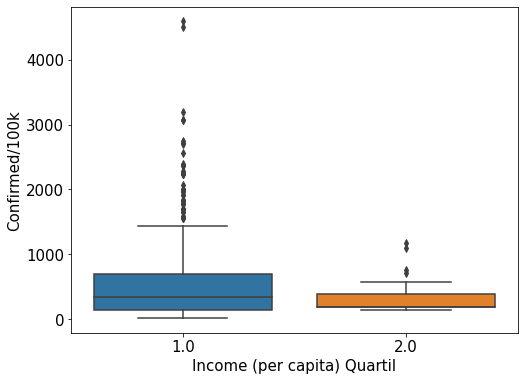

In [60]:
plt.figure(figsize=(8,6))
sns.boxplot(
    x=df_mod.columns[-1],
    y=df_mod.columns[0],
    data=df_mod,
)
if print_campo == 's':
    col2 = lista_pastas[5]
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=dpi)

In [61]:
campo_test = 'Income (per capita)'
for c in range(1, 3):
    print(c)
    print(f"{df_mod[df_mod[campo_test + ' Quartil'] == c][campo_test].min()}")
    print(f"{df_mod[df_mod[campo_test + ' Quartil'] == c][campo_test].max()}")

1
1.4
3.8
2
3.9
6.4


In [62]:
campo_test = 'MHDI'
for c in range(1, 4):
    print(c)
    print(f"{df_mod[df_mod[campo_test + ' Quartil'] == c][campo_test].min()}")
    print(f"{df_mod[df_mod[campo_test + ' Quartil'] == c][campo_test].max()}")

1
0.49
0.613
2
0.614
0.737
3
0.738
0.862
